# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))  # prints no. of records
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [24]:
#Your code here
df.columns = df.columns.str.lower()
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

# Change the Index to be the Line Names

In [25]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [34]:
# Your code here
df.reset_index(inplace=True)
df.head()

,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
1,2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2,2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
3,2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
4,2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [27]:
# Your code here result = df.sort(['A', 'B'], ascending=[1, 0])
df['Num_Lines'] = df.linename.map(lambda x: len(x))


In [35]:
df=df.sort_values(by=['Num_Lines'], ascending=False)
df.head()

,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2615,132255,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,08/31/2018,04:00:00,REGULAR,68217145,17201834,12
2617,132253,1237ACENQRSW,R148,R033,01-06-01,TIMES SQ-42 ST,IRT,08/30/2018,20:00:00,REGULAR,68216902,17201755,12
2618,132414,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,08/28/2018,11:29:43,REGULAR,6291546,8895428,12
2619,132412,1237ACENQRSW,R151,R033,00-00-03,TIMES SQ-42 ST,IRT,08/28/2018,08:00:00,REGULAR,6291234,8894593,12


## Write a function to clean a column name.

In [36]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [37]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [38]:
#Checking the output, we can see the results.
df.columns

Index(['index', 'linename', 'c/a', 'unit', 'scp', 'station', 'division',
       'date', 'time', 'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

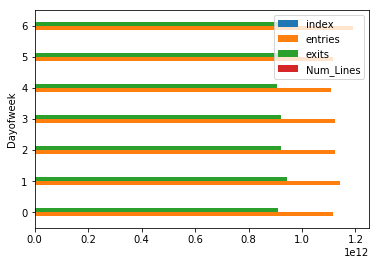

In [43]:
#Your code here
#df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [47]:
#Your code here
grouped = grouped.reset_index()
grouped.head(7)

,level_0,Dayofweek,index,entries,exits,Num_Lines
0,0,0,2783610827,1114237052454,911938153513,76110
1,1,1,2833413973,1143313287046,942230721477,77303
2,2,2,2781528032,1123655222441,920630864687,75713
3,3,3,2817391725,1122723988662,920691927110,76607
4,4,4,2778112001,1110224700078,906799065337,75573
5,5,5,2741377942,1115661545514,909142081474,74725
6,6,6,2792287000,1192306179082,959223750461,75306


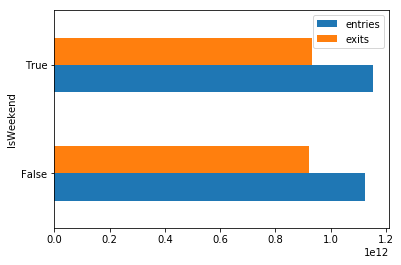

In [51]:
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')
#More traffic on a weekend

# Drop a couple of columns

In [52]:
# Your code here
#DROP columns
df = df.drop(['c/a', 'unit'], axis=1) 
df.head()


,index,linename,scp,station,division,date,time,desc,entries,exits,Num_Lines,Dayofweek
0,132292,1237ACENQRSW,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,3
2615,132255,1237ACENQRSW,01-06-01,TIMES SQ-42 ST,IRT,2018-08-31,04:00:00,REGULAR,68217145,17201834,12,4
2617,132253,1237ACENQRSW,01-06-01,TIMES SQ-42 ST,IRT,2018-08-30,20:00:00,REGULAR,68216902,17201755,12,3
2618,132414,1237ACENQRSW,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,11:29:43,REGULAR,6291546,8895428,12,1
2619,132412,1237ACENQRSW,00-00-03,TIMES SQ-42 ST,IRT,2018-08-28,08:00:00,REGULAR,6291234,8894593,12,1
